## Problem Statement
The objective of this project is to create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, we aim to develop a reliable tool for assisting medical professionals in diagnosing breast cancer.

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Data



In [2]:
#loading the dataset
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


## Exploratory data Analysis

In [3]:
df.shape

(569, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
#descriptive Summary
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
#Null values
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [7]:
#Duplicates
df.duplicated().sum()

0

#Visualizing the data

1    357
0    212
Name: diagnosis, dtype: int64


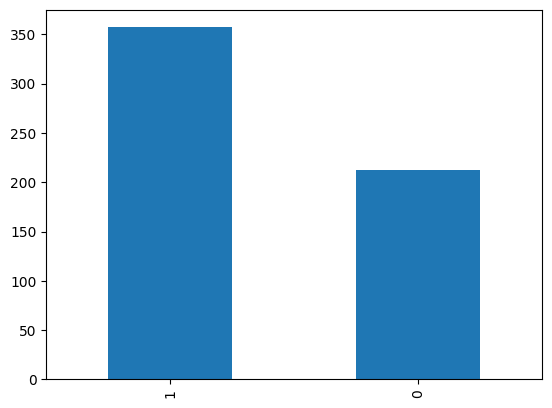

In [8]:
#Let's check the count of target variable
print(df.diagnosis.value_counts())
df.diagnosis.value_counts()[0:30].plot(kind='bar')
plt.show()

Description of mean_radius
----------------------------------------------------------------------------
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean_radius, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


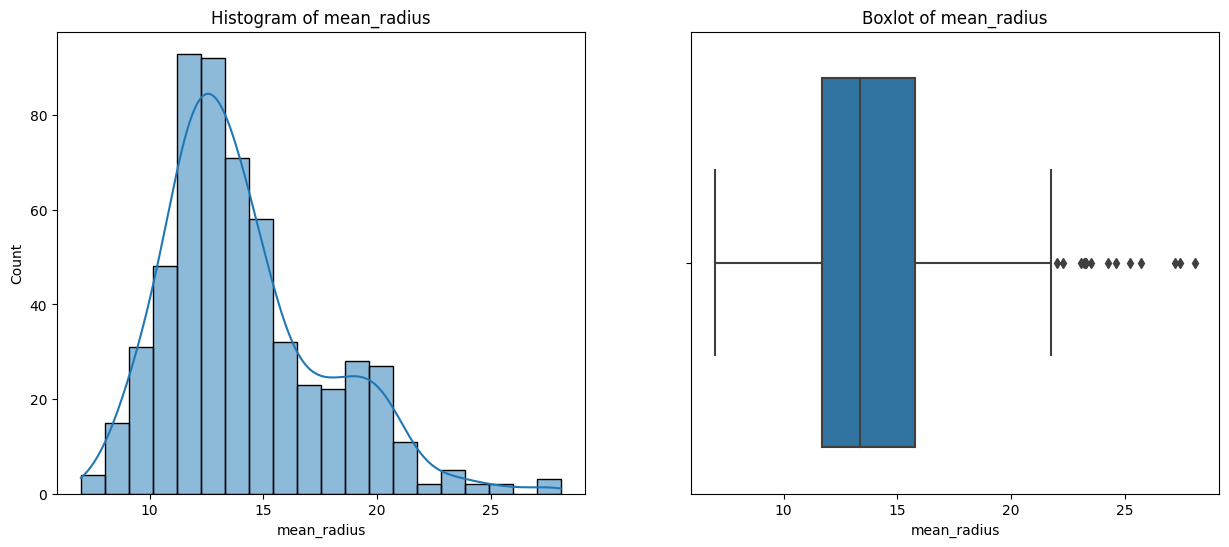

Description of mean_texture
----------------------------------------------------------------------------
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: mean_texture, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


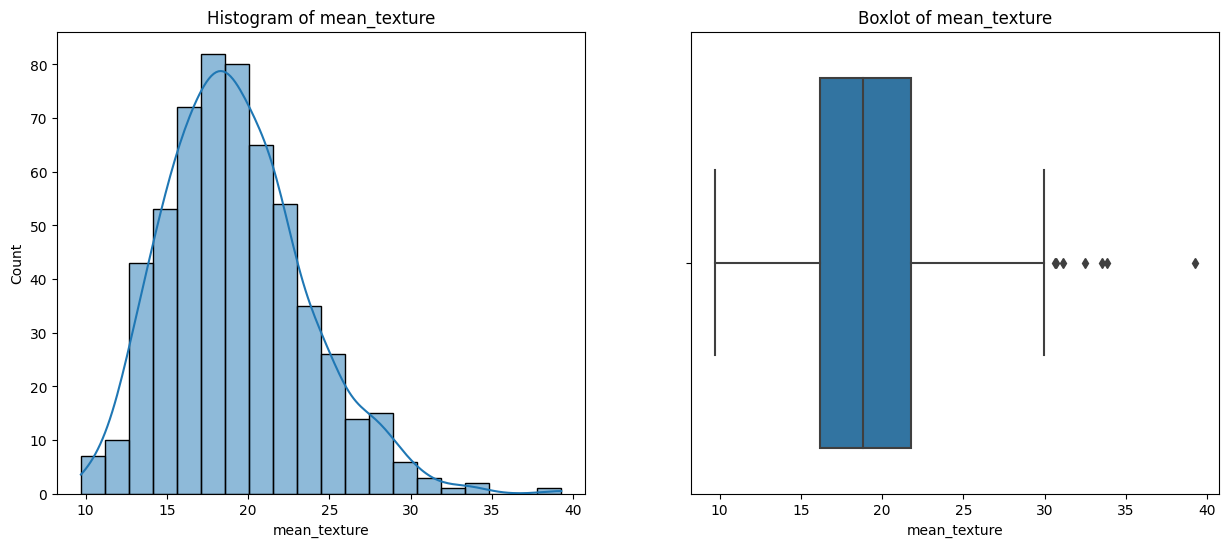

Description of mean_perimeter
----------------------------------------------------------------------------
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: mean_perimeter, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


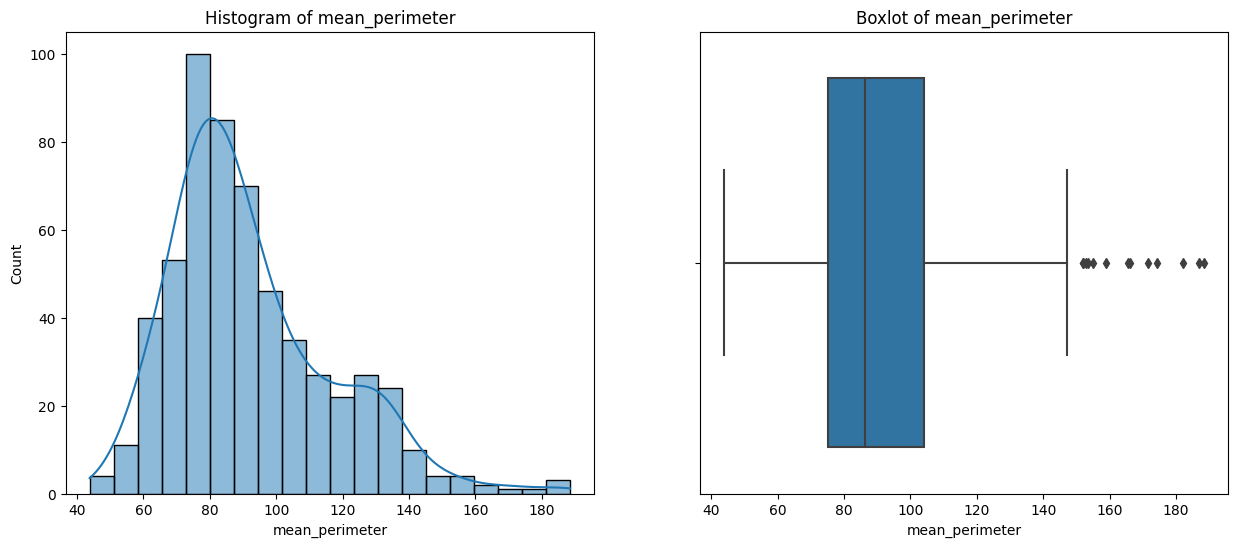

Description of mean_area
----------------------------------------------------------------------------
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean_area, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


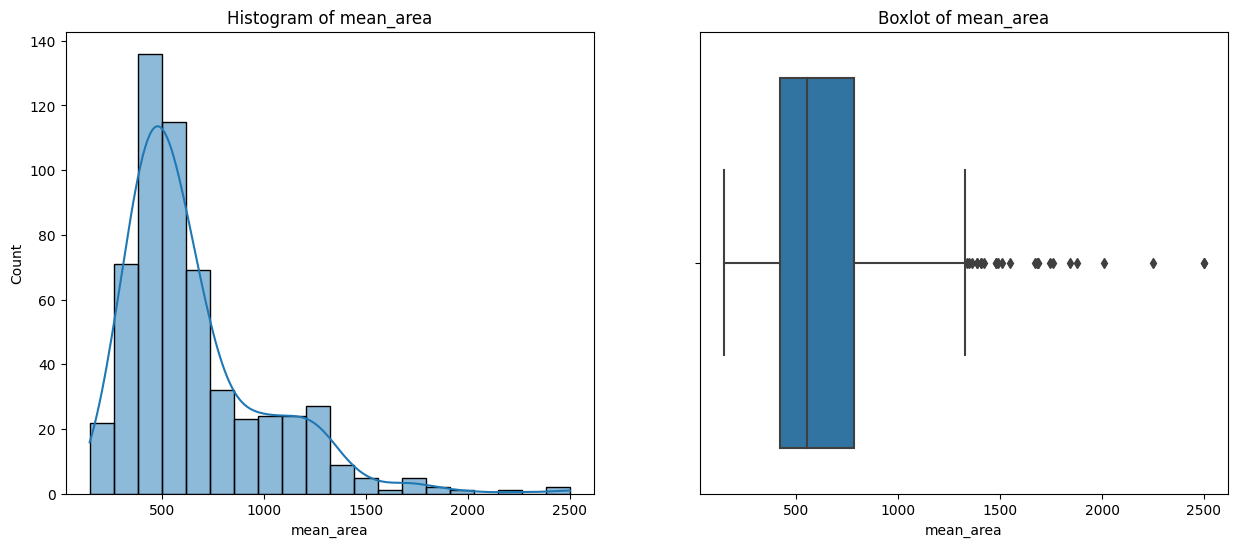

Description of mean_smoothness
----------------------------------------------------------------------------
count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: mean_smoothness, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


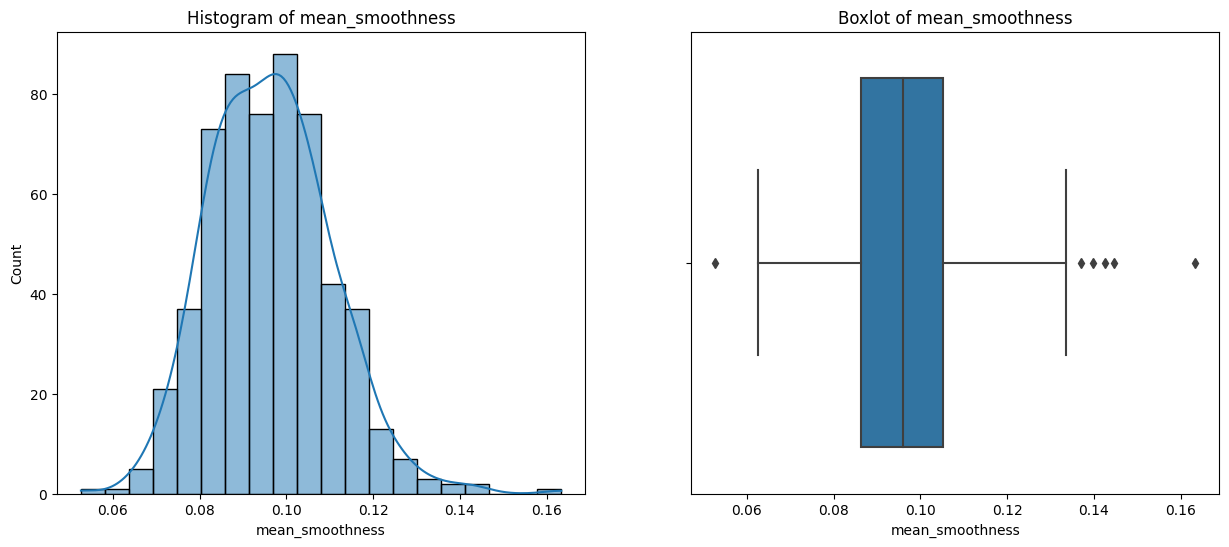

Description of diagnosis
----------------------------------------------------------------------------
count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


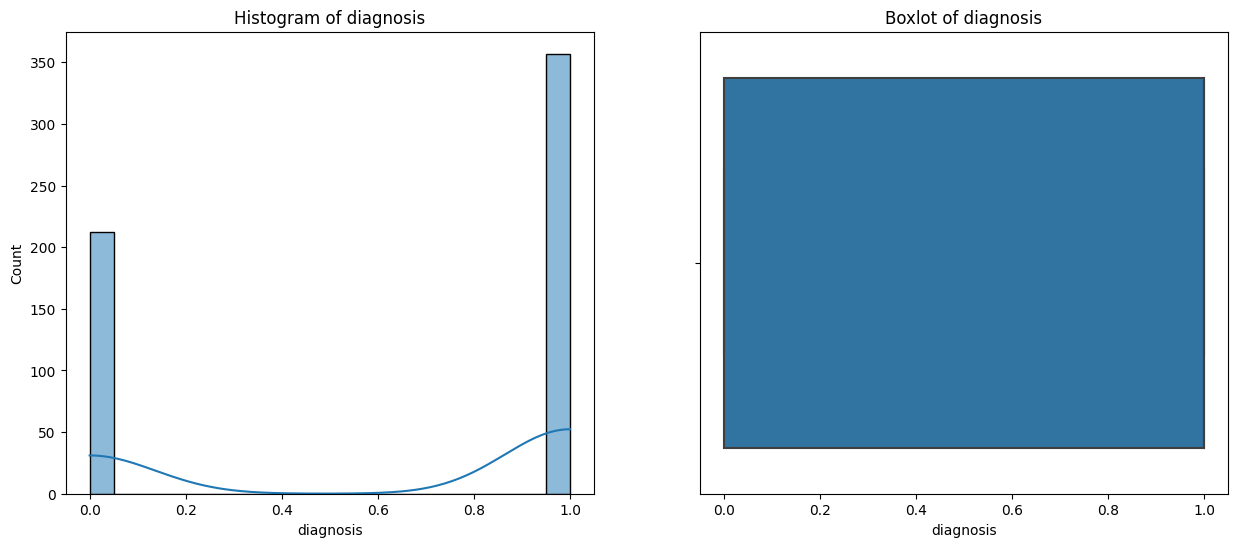

In [9]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)

    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )

    plt.show()
for x in df:
    univariateAnalysis_numeric(x,20)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


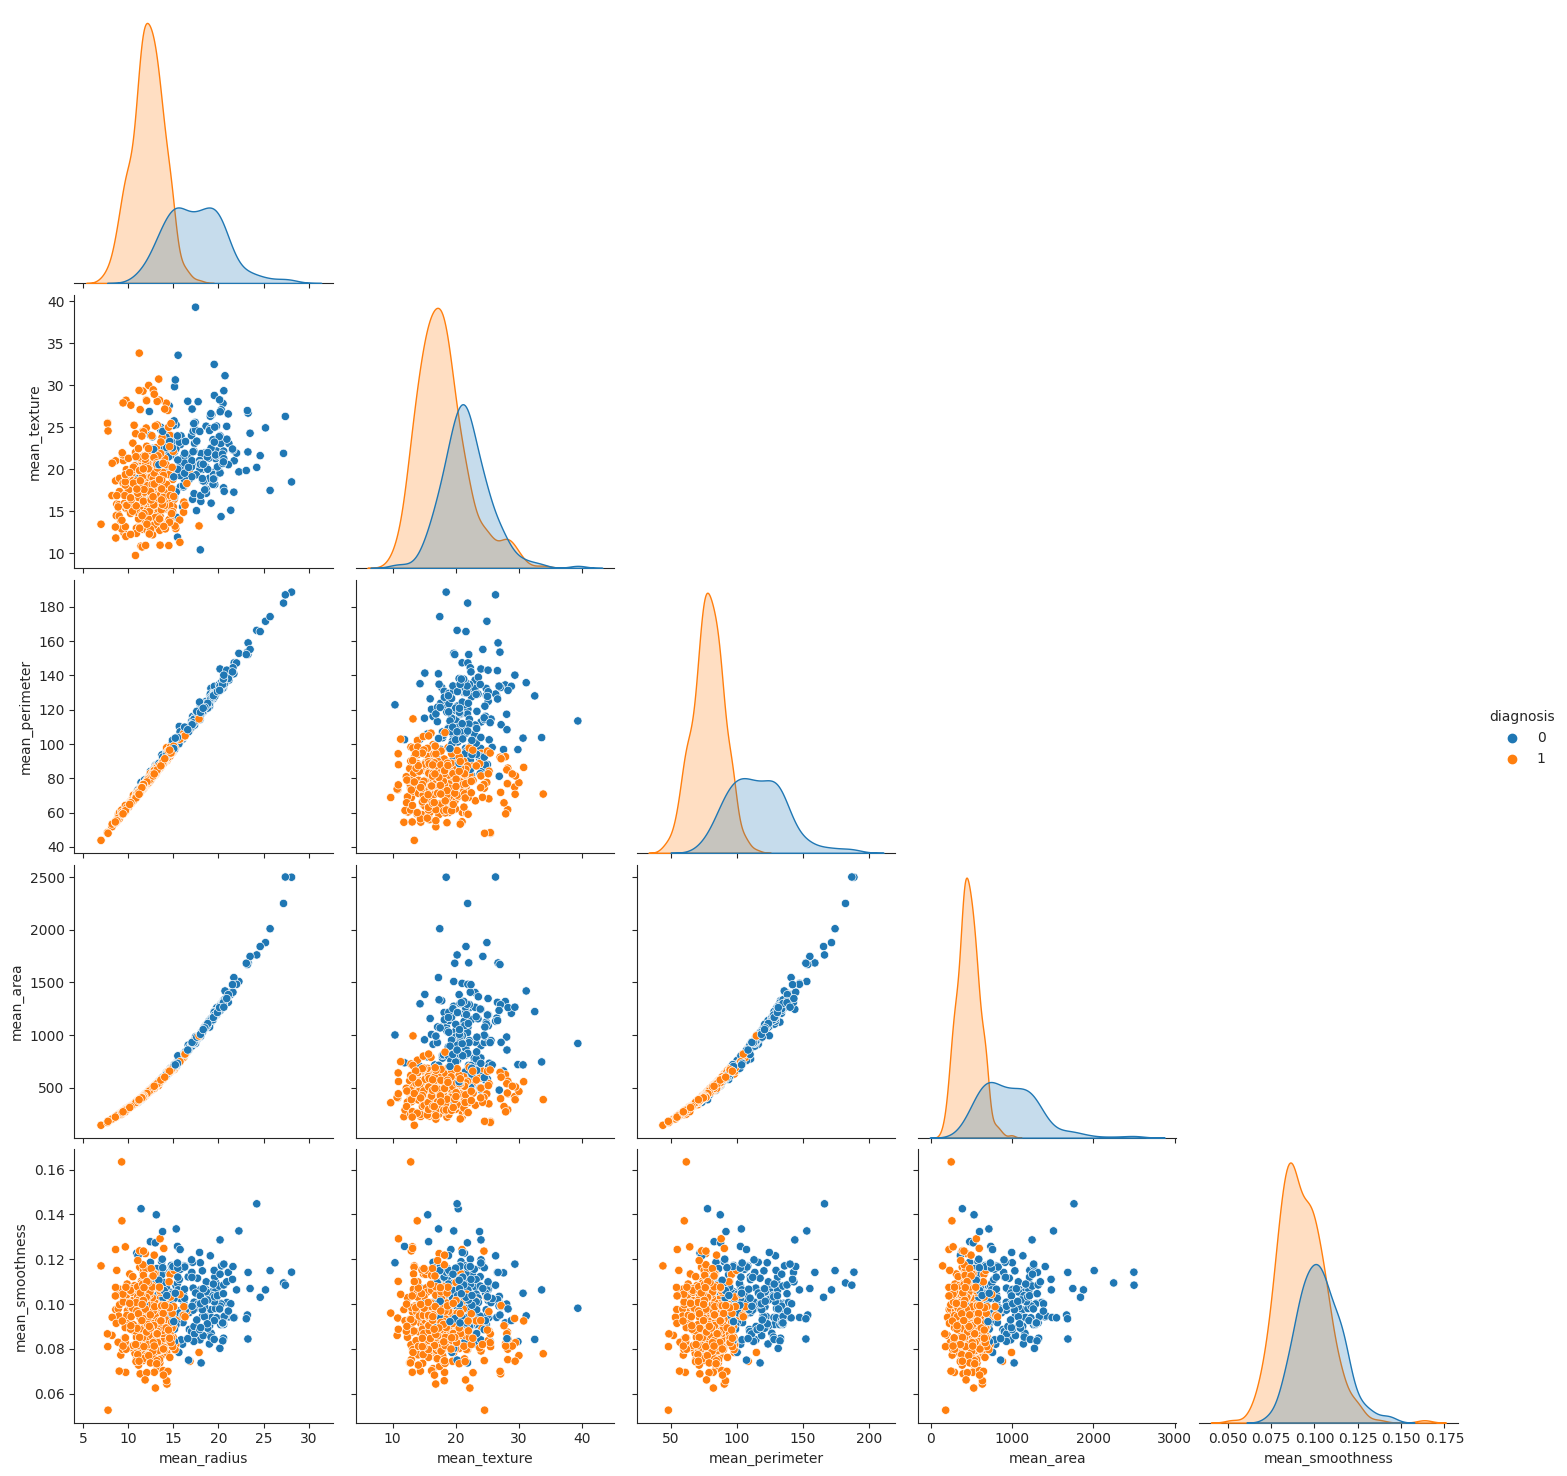

In [10]:
sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis",size=3,corner=True) ;
plt.show()

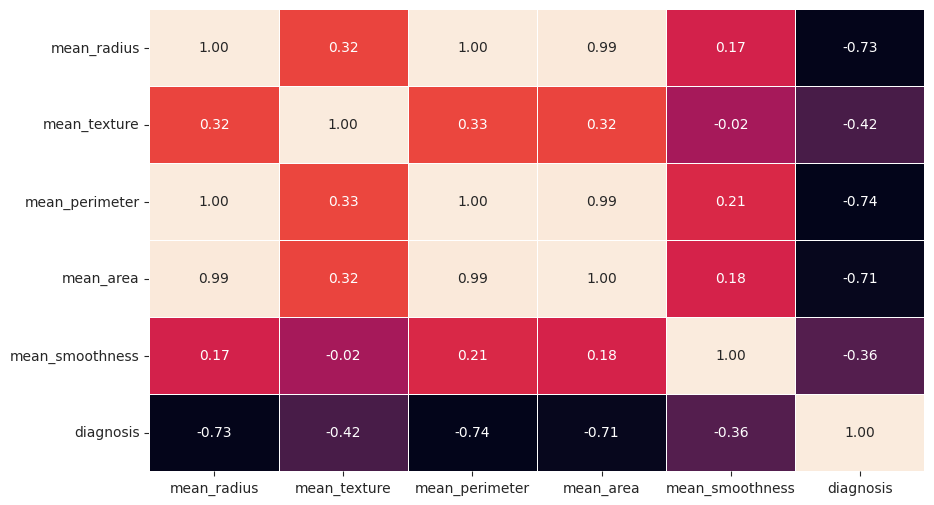

In [11]:
#Correlation heatmap
corr = df.corr(method='pearson')
fig = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,fmt='.2f', cbar=None, linewidth=0.5)
plt.show()


##Trail Test Split

In [12]:
#Using 90% Train & 20% for test
from sklearn.model_selection import train_test_split
Y = df['diagnosis']
X = df.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [13]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


## 1. Logistic regression classification


In [14]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

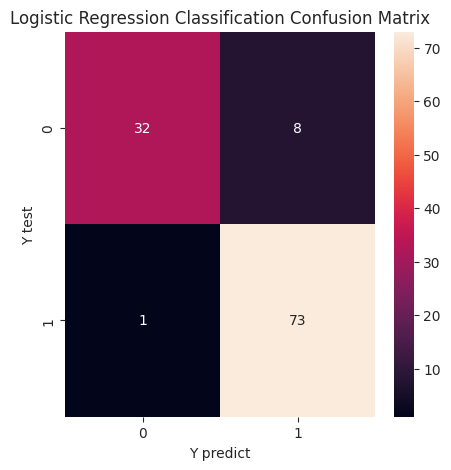

In [15]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, ax=ax)
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [16]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.9210526315789473


In [17]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict1)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


## 2. Decision tree classification


In [18]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

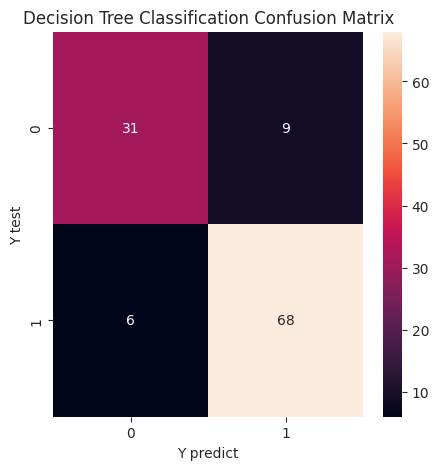

In [19]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, ax=ax)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [20]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.868421052631579


In [21]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict4)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


## 3. Random forest classification

In [22]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

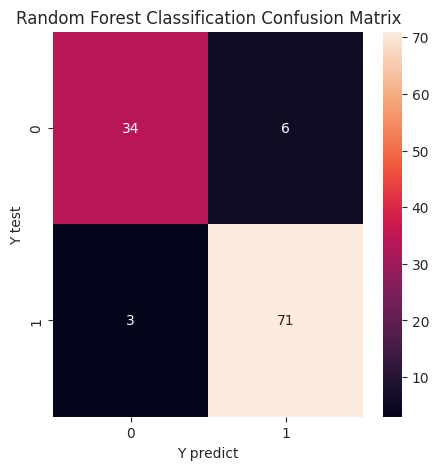

In [23]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True,ax=ax)
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.9210526315789473


In [25]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


## 4. K-Nearest Neighbor classification




In [26]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

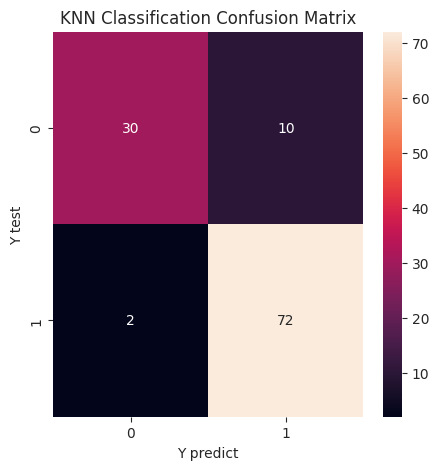

In [27]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, ax=ax)
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [28]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8947368421052632


In [29]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.87


# Comparison of classification techniques

### Test score

In [30]:
Testscores = pd.Series([score_logreg, score_dtcla, score_rfcla, score_knncla],
                        index=['Logistic Regression Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score'])
print(Testscores)

Logistic Regression Score    0.921053
Decision Tree Score          0.868421
Random Forest Score          0.921053
K-Nearest Neighbour Score    0.894737
dtype: float64


### The confusion matrix

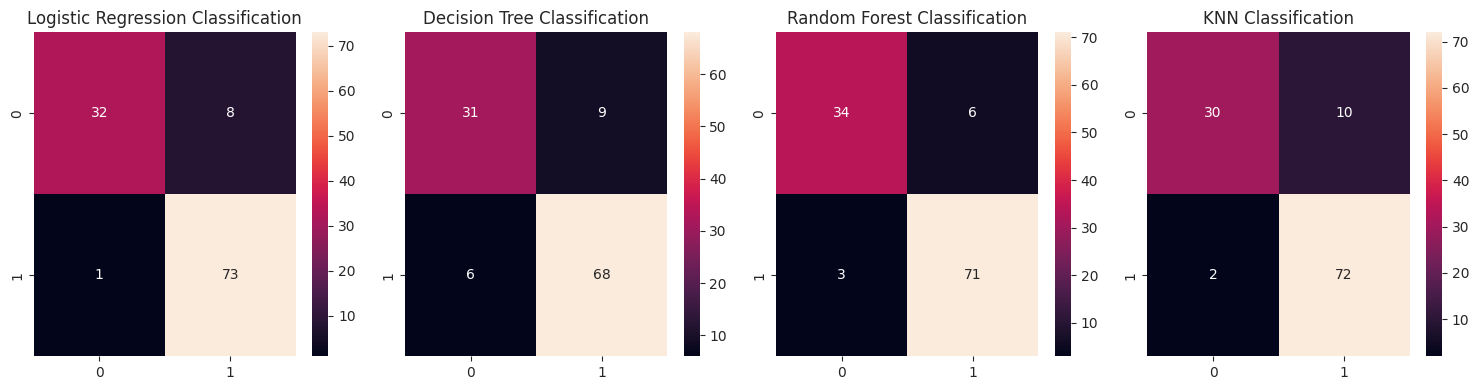

In [31]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title('Logistic Regression Classification')
ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title('Decision Tree Classification')
ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title('Random Forest Classification')
ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True,  fmt='g', ax=ax1)
sns.heatmap(data=dtcla_cm, annot=True, fmt='g', ax=ax2)
sns.heatmap(data=rfcla_cm, annot=True,  fmt='g', ax=ax3)
sns.heatmap(data=knncla_cm, annot=True, fmt='g', ax=ax4)
plt.tight_layout()
plt.show()

- Logistic Regression Classification and Random Forest have the most optimal result of the accuracy.

### ROC curve

Plotting ROC to illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

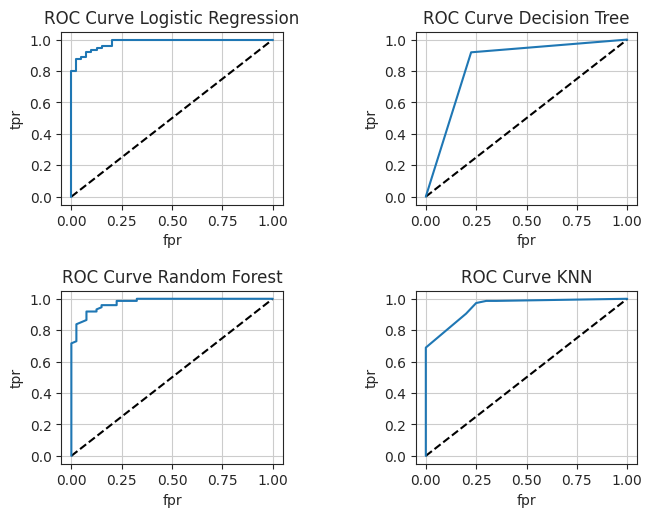

In [37]:
from sklearn.metrics import roc_curve
classifiers = [logreg, dtcla, rfcla, knncla]
classifier_names = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"]
for i, classifier in enumerate(classifiers):
    Y_predict_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_proba)
    plt.subplot(2, 2, i + 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=classifier_names[i])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC Curve ' + classifier_names[i])
    plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.50, wspace=0.6)
plt.show()
